In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('train_0OECtn8.csv')

In [3]:
df.isnull().sum()

row_id              0
user_id             0
category_id         0
video_id            0
age                 0
gender              0
profession          0
followers           0
views               0
engagement_score    0
dtype: int64

In [4]:
df.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89197 entries, 0 to 89196
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_id            89197 non-null  int64  
 1   user_id           89197 non-null  int64  
 2   category_id       89197 non-null  int64  
 3   video_id          89197 non-null  int64  
 4   age               89197 non-null  int64  
 5   gender            89197 non-null  object 
 6   profession        89197 non-null  object 
 7   followers         89197 non-null  int64  
 8   views             89197 non-null  int64  
 9   engagement_score  89197 non-null  float64
dtypes: float64(1), int64(7), object(2)
memory usage: 6.8+ MB


In [6]:
# Dropping row ID as it has no impact over the model
df = df.drop(['row_id',], axis=1)

In [7]:
df.head()

,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,19990,37,128,24,Male,Student,180,1000,4.33
1,5304,32,132,14,Female,Student,330,714,1.79
2,1840,12,24,19,Male,Student,180,138,4.35
3,12597,23,112,19,Male,Student,220,613,3.77
4,13626,23,112,27,Male,Working Professional,220,613,3.13


In [8]:
# df = df.drop('user_id', axis=1)

In [9]:
df.describe()

,user_id,category_id,video_id,age,followers,views,engagement_score
count,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000
mean,13881.909806,18.323733,77.715383,24.848616,252.460172,502.980268,3.487797
std,8005.582771,11.675154,48.469656,8.955535,46.094468,268.569482,0.863498
min,1.000000,1.000000,1.000000,10.000000,160.000000,30.000000,0.000000
25%,6945.000000,8.000000,34.000000,18.000000,230.000000,229.000000,2.900000
50%,13892.000000,16.000000,76.000000,23.000000,240.000000,467.000000,3.710000
75%,20819.000000,26.000000,120.000000,32.000000,280.000000,714.000000,4.150000
max,27734.000000,47.000000,175.000000,68.000000,360.000000,1000.000000,5.000000


In [10]:
#Checking null values
df.isnull().sum()

user_id             0
category_id         0
video_id            0
age                 0
gender              0
profession          0
followers           0
views               0
engagement_score    0
dtype: int64

In [11]:
# Checking duplicate values and didnt find any 
df[df.duplicated()]

,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score


### Checking outliers using boxplot 

<AxesSubplot:>

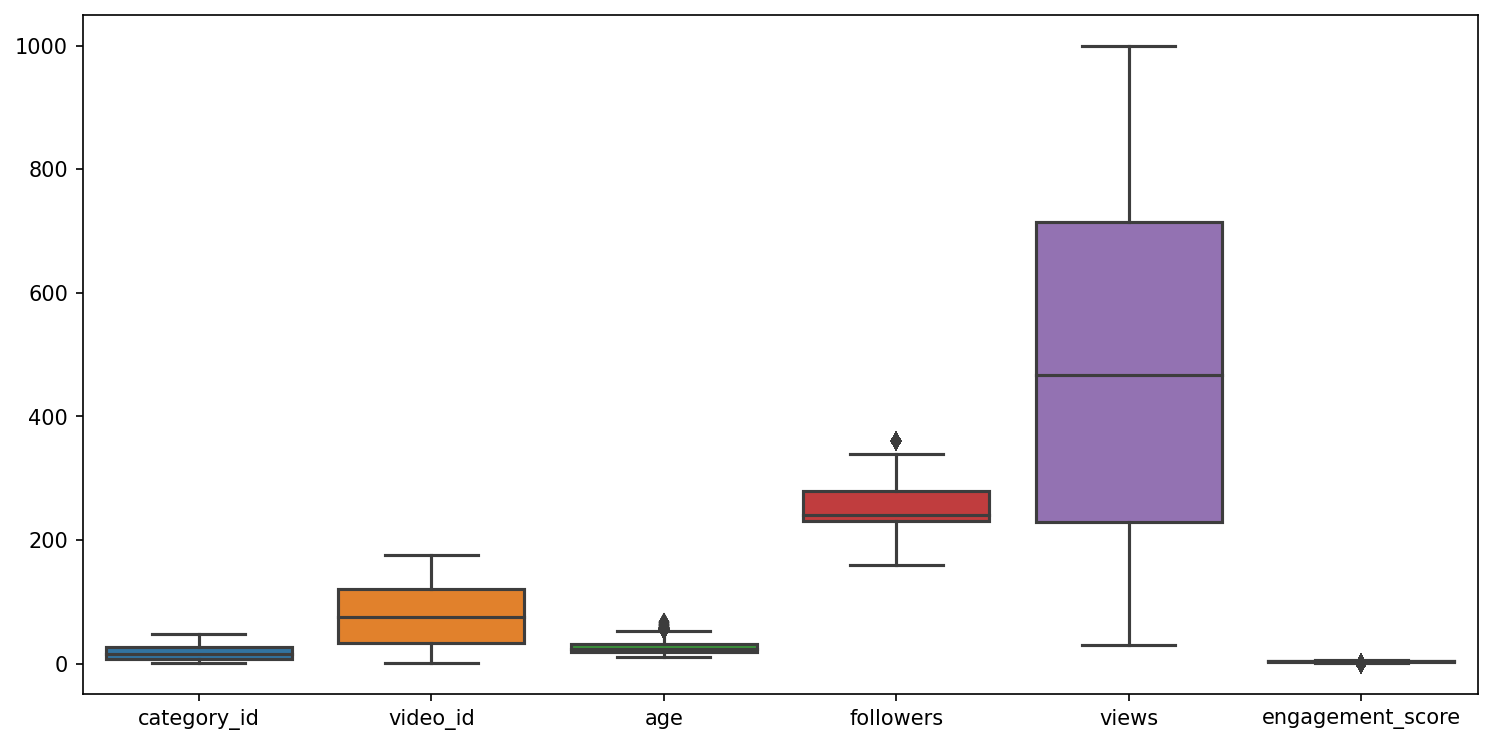

In [12]:
# Box plot for checking the outliers 
plt.figure(figsize=(12,6),dpi=150)
sns.boxplot(data=df[['category_id','video_id','age','followers','views','engagement_score']])

<AxesSubplot:>

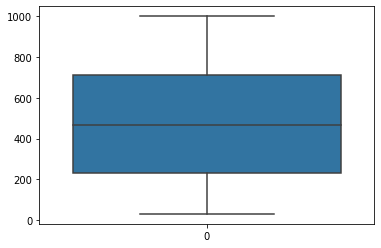

In [13]:
sns.boxplot(data=df['views'])

<AxesSubplot:xlabel='views', ylabel='Count'>

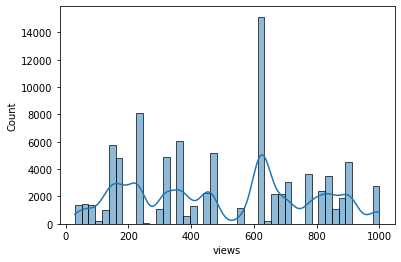

In [14]:
sns.histplot(data=df['views'], kde=True)

<AxesSubplot:xlabel='category_id', ylabel='Count'>

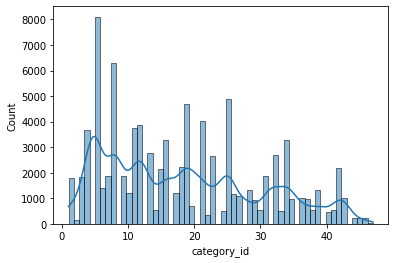

In [15]:
sns.histplot(data=df['category_id'], kde=True)

<AxesSubplot:xlabel='video_id', ylabel='Count'>

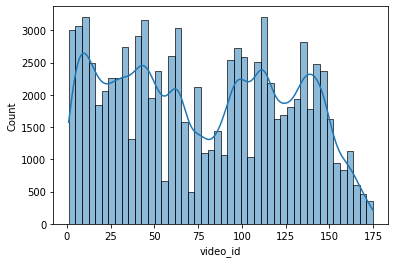

In [16]:
sns.histplot(data=df['video_id'], kde=True)

<AxesSubplot:xlabel='age', ylabel='Count'>

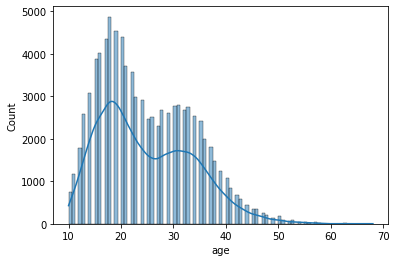

In [17]:
sns.histplot(data=df['age'], kde=True)

In [18]:
# sns.histplot(data=df['followers'], kde=True)

<AxesSubplot:xlabel='engagement_score', ylabel='Count'>

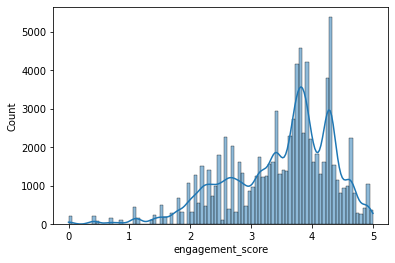

In [19]:
sns.histplot(data=df['engagement_score'], kde=True)

<AxesSubplot:xlabel='gender', ylabel='count'>

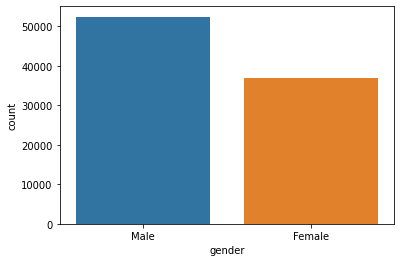

In [20]:
sns.countplot(data=df, x='gender')

<AxesSubplot:xlabel='profession', ylabel='count'>

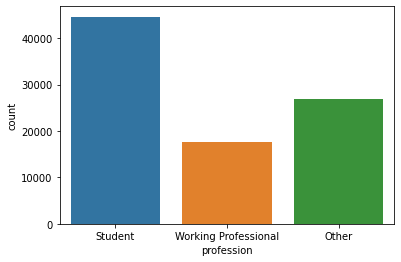

In [21]:
sns.countplot(data=df, x='profession')

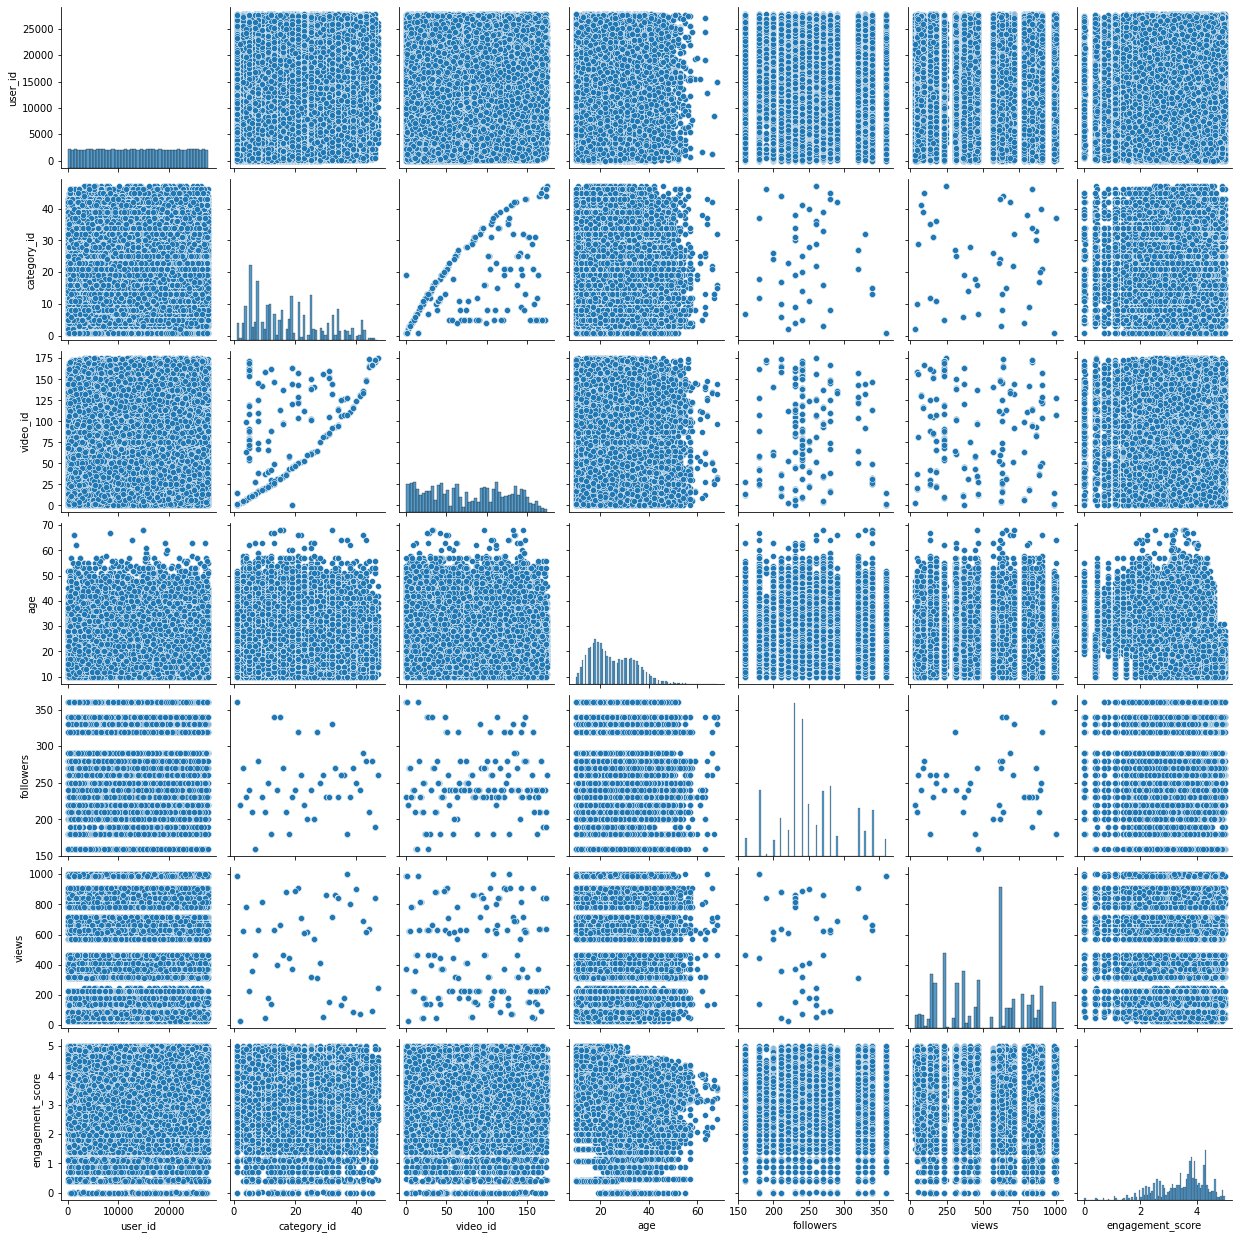

In [22]:
sns.pairplot(data=df)

In [23]:
df.columns

Index(['user_id', 'category_id', 'video_id', 'age', 'gender', 'profession',
       'followers', 'views', 'engagement_score'],
      dtype='object')

In [24]:
df.head()

,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,19990,37,128,24,Male,Student,180,1000,4.33
1,5304,32,132,14,Female,Student,330,714,1.79
2,1840,12,24,19,Male,Student,180,138,4.35
3,12597,23,112,19,Male,Student,220,613,3.77
4,13626,23,112,27,Male,Working Professional,220,613,3.13


## Encoding categorical columns

In [25]:
#Dummy variable encoding in the dataframe for categorical values
df = pd.get_dummies(df)

In [26]:
df.head()

,user_id,category_id,video_id,age,followers,views,engagement_score,gender_Female,gender_Male,profession_Other,profession_Student,profession_Working Professional
0,19990,37,128,24,180,1000,4.33,0,1,0,1,0
1,5304,32,132,14,330,714,1.79,1,0,0,1,0
2,1840,12,24,19,180,138,4.35,0,1,0,1,0
3,12597,23,112,19,220,613,3.77,0,1,0,1,0
4,13626,23,112,27,220,613,3.13,0,1,0,0,1


In [27]:
# Computing the correlation with engagemnet_score with various columns
df.corr()['engagement_score']

user_id                           -0.002900
category_id                       -0.094288
video_id                          -0.030552
age                               -0.232626
followers                          0.000855
views                             -0.084679
engagement_score                   1.000000
gender_Female                     -0.408702
gender_Male                        0.408702
profession_Other                  -0.120076
profession_Student                 0.289979
profession_Working Professional   -0.225363
Name: engagement_score, dtype: float64

In [28]:
# Dividing the data dependent and independent variable 
X = df.drop('engagement_score', axis=1)
y = df['engagement_score']

## Train test split 

In [29]:
# Dividing the data in train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [30]:
X.head()

,user_id,category_id,video_id,age,followers,views,gender_Female,gender_Male,profession_Other,profession_Student,profession_Working Professional
0,19990,37,128,24,180,1000,0,1,0,1,0
1,5304,32,132,14,330,714,1,0,0,1,0
2,1840,12,24,19,180,138,0,1,0,1,0
3,12597,23,112,19,220,613,0,1,0,1,0
4,13626,23,112,27,220,613,0,1,0,0,1


## Model Selection 

### 1. XGBoostRegressor

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
# Importing XGBoostRegressor model
import xgboost as xgb
from xgboost import XGBRegressor

In [33]:
# Using Grid Search we approcahed these hyper parameters 
model = XGBRegressor(learning_rate=0.2, max_depth= 12, n_estimators= 150)

In [34]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_delta_step=0,
             max_depth=12, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=150, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [35]:
preds = model.predict(X_test)

### 3. GradientBoostingRegressor 

In [36]:
from sklearn.ensemble import GradientBoostingRegressor

In [37]:
gbr = GradientBoostingRegressor()

In [38]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [39]:
prd = gbr.predict(X_test)

In [40]:
r2_score(y_test, prd)

0.34454619144957355

### Model Evaluation r2_score 

#### 1. XGBoost

In [41]:
from sklearn.metrics import r2_score, mean_squared_error

In [42]:
r2_score(y_test, preds)

0.3902459274524872

In [43]:
np.sqrt(mean_squared_error(y_test, preds))

0.677013892384848

#### 2. GradientBoost 

In [44]:
r2_score(y_test, prd)

0.34454619144957355

In [45]:
np.sqrt(mean_squared_error(y_test, prd))

0.7019259062196822

## Working on Test data

In [46]:
xgb_model = XGBRegressor(learning_rate=0.2, max_depth= 12, n_estimators= 150)

In [47]:
xgb_model.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_delta_step=0,
             max_depth=12, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=150, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [48]:
test_data = pd.read_csv('test_1zqHu22.csv')

In [49]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11121 entries, 0 to 11120
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   row_id       11121 non-null  int64 
 1   user_id      11121 non-null  int64 
 2   category_id  11121 non-null  int64 
 3   video_id     11121 non-null  int64 
 4   age          11121 non-null  int64 
 5   gender       11121 non-null  object
 6   profession   11121 non-null  object
 7   followers    11121 non-null  int64 
 8   views        11121 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 782.1+ KB


In [50]:
test_data.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
0,89198,7986,12,42,14,Male,Student,180,138
1,89199,11278,34,115,14,Male,Student,230,840
2,89200,17245,8,110,44,Female,Working Professional,280,628
3,89201,9851,16,137,18,Male,Student,270,462
4,89202,16008,34,96,47,Female,Other,230,840


In [51]:
row_id = test_data['row_id']

In [52]:
# Dropping Row_ID
test_data = test_data.drop('row_id', axis=1)

<AxesSubplot:xlabel='age', ylabel='Count'>

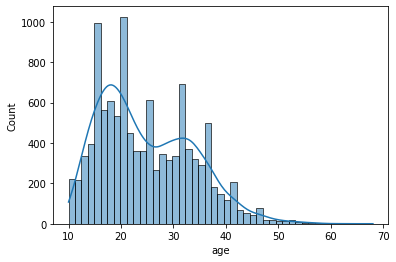

In [53]:
sns.histplot(data=test_data['age'], kde=True)

In [54]:
test_data = pd.get_dummies(test_data)

In [55]:
engagement_score = xgb_model.predict(test_data)

In [56]:
engagement_score

array([4.098719 , 3.5294447, 2.7821805, ..., 3.4001312, 3.9577665,
       2.9290798], dtype=float32)

In [57]:
df_final = pd.DataFrame()

In [58]:
df_final['row_id'] = row_id

In [59]:
df_final['engagement_score'] = engagement_score

In [60]:
df_final.head()

,row_id,engagement_score
0,89198,4.098719
1,89199,3.529445
2,89200,2.782181
3,89201,3.197111
4,89202,1.779126


In [61]:
# Saving the file to csv
df_final.to_csv('final2.csv', index=False)